In [62]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, log_loss, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200

In [47]:
df = pd.read_csv('online_shoppers_intention.csv')

In [48]:
to_dummy = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']

for vari in to_dummy:
    df = pd.concat([df, pd.get_dummies(df[vari],drop_first=True,prefix=vari)], axis=1)
    df.drop(vari, axis=1, inplace=True)

In [49]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [51]:
X = df.drop(['Revenue'],axis=1)
y = df.Revenue

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [53]:
std = StandardScaler()
std.fit(X_train)
X_train_st = std.transform(X_train)
X_test_st = std.transform(X_test)

ros = RandomOverSampler(random_state=0)
X_train_st_resampled, y_train_resampled = ros.fit_sample(X_train_st,y_train)
X_train_st_smoted, y_train_smoted = SMOTE(random_state=42).fit_sample(X_train_st,y_train)
X_train_st_adasyn, y_train_adasyn = ADASYN(random_state=42).fit_sample(X_train_st,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [42]:
y.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [16]:
def print_summary(model,X,y):
    #print(f'{model}')
    print(f'f1 score: {f1_score(y, model.predict(X))}')
    print(f'precision score: {precision_score(y, model.predict(X))}')
    print(f'recall score: {recall_score(y, model.predict(X))}')
    print(f'log loss: {log_loss(y, model.predict(X))}')
    print(f'roc auc: {roc_auc_score(y, model.predict(X))}')
    print(f'conf matrix: \n {confusion_matrix(y, model.predict(X))}')

In [ ]:
# dictionary containing model nicknames, model initiations, and model hyperparameter grids

model_dict = {
    'log': [LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=2000),
            {'multi_class': ['ovr', 'multinomial', 'auto'], 
             'C':list(10**np.linspace(-3,3,10))}
           ],
    'rfc': [RandomForestClassifier(n_estimators=200, max_depth=20,random_state=0),
            {'criterion': ['entropy'], 
              'max_depth': [10,40], 
              #'min_samples_split': [2,5], 
              'max_features': ['sqrt']}
           ],
    'gnb': [GaussianNB(),
            {}
           ],
    'knn': [KNeighborsClassifier(n_neighbors = 10),
           {'n_neighbors': list(np.linspace(3,31,15).astype(int)),
            'p': [1,2]
           }
           ],
    'svm': [SVC(gamma = 'scale'),
           {'kernel': ['linear', 'poly'], #, 'rbf', 'sigmoid'
            'C': list(10**np.linspace(-2,2,4))
           }
           ]
}

In [ ]:
for dataset [normal, resampled, adasyn, smote]
    for nickname, model in model_dict.items():
        model_name = nickname + '_model'
        model_name = GridSearchCV(model[0],model[1],cv=5,scoring='roc_auc',iid=False,n_jobs = -1,verbose=1).fit(X_train_st, y_train)
        pickle.dump(model_name.best_estimator_, open(f'{nickname}.pkl', 'wb'))
        print_summary(model_name.best_estimator_,X_test_st,y_test)

In [9]:
def model_summary(model, X, y):
    print(model)
    print(f'f1 score: {f1_score(y, model.predict(X))}')
    print(f'precision score: {precision_score(y, model.predict(X))}')
    print(f'recall score: {recall_score(y, model.predict(X))}')
    print(f'log loss: {log_loss(y, model.predict(X))}')
    print(f'roc auc: {roc_auc_score(y, model.predict(X))}')
    print(f'conf matrix: \n {confusion_matrix(y, model.predict(X))}')

In [35]:
rfc_grid = {'criterion': ['entropy'],
         'n_estimators': [1000],
         'max_depth': [12,13,14],
         'min_samples_split': [4,5],
         'max_features': ['sqrt']}

In [61]:
rfc = GridSearchCV(RandomForestClassifier(),
                   param_grid = rfc_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st,y_train).best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   53.7s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.0min finished


In [36]:
rfc_rs = GridSearchCV(RandomForestClassifier(n_estimators=800, max_depth=20,random_state=0),
                   param_grid = rfc_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st_resampled,y_train_resampled).best_estimator_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.6min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


In [64]:
rfc_smote = GridSearchCV(RandomForestClassifier(random_state=0),
                   param_grid = rfc_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st_smoted,y_train_smoted).best_estimator_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.9min remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.2min finished


In [20]:
log_grid = {'multi_class': ['ovr', 'multinomial', 'auto'],
            'C': list(10**np.linspace(-4,1,100))
           }

log = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
                   param_grid = log_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st,y_train).best_estimator_


Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   45.2s finished


In [32]:
log_rs = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
                   param_grid = log_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st_resampled,y_train_resampled).best_estimator_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.1min finished


In [55]:
log_smote = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
                   param_grid = log_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st_smoted,y_train_smoted).best_estimator_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.3min finished


In [56]:
log_adasyn = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
                   param_grid = log_grid,
                   cv=3,
                   scoring='roc_auc',
                   iid=False,
                   n_jobs = -1,
                   verbose = 5).fit(X_train_st_adasyn,y_train_adasyn).best_estimator_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.1min finished


In [57]:
model_summary(log_smote,X_test_st,y_test)

LogisticRegression(C=869.7490026177834, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)
f1 score: 0.6359832635983264
precision score: 0.5507246376811594
recall score: 0.7524752475247525
log loss: 4.874165647036337
roc auc: 0.8161018332677108
conf matrix: 
 [[1814  248]
 [ 100  304]]


In [58]:
model_summary(log_adasyn,X_test_st,y_test)

LogisticRegression(C=1.072267222010323, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
f1 score: 0.6345957011258957
precision score: 0.5410122164048866
recall score: 0.7673267326732673
log loss: 5.000224439216243
roc auc: 0.8198903304491457
conf matrix: 
 [[1799  263]
 [  94  310]]


In [59]:
model_summary(log,X_test_st,y_test)

LogisticRegression(C=0.021544346900318846, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
f1 score: 0.48821548821548816
precision score: 0.7631578947368421
recall score: 0.3589108910891089
log loss: 4.2578361743459885
roc auc: 0.668543709366087
conf matrix: 
 [[2017   45]
 [ 259  145]]


In [60]:
model_summary(log_rs,X_test_st,y_test)

LogisticRegression(C=247.7076355991714, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
f1 score: 0.6240988671472709
precision score: 0.5343915343915344
recall score: 0.75
log loss: 5.112272699863736
roc auc: 0.8109844810863239
conf matrix: 
 [[1798  264]
 [ 101  303]]


In [40]:
model_summary(rfc_rs,X_test_st,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
f1 score: 0.7076271186440677
precision score: 0.6185185185185185
recall score: 0.8267326732673267
log loss: 3.865720600999988
roc auc: 0.8634148332389009
conf matrix: 
 [[1856  206]
 [  70  334]]


In [88]:
model_summary(rfc_smote,X_test_st,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
f1 score: 0.7160220994475138
precision score: 0.6467065868263473
recall score: 0.801980198019802
log loss: 3.5995973488390884
roc auc: 0.8580706033745955
conf matrix: 
 [[1885  177]
 [  80  324]]


In [69]:
important_features = pd.Series(rfc_smote.feature_importances_).nlargest(10).index
for i in important_features:
    print(X.columns[i])

PageValues
Administrative
ExitRates
ProductRelated_Duration
ProductRelated
Administrative_Duration
Month_Nov
BounceRates
Informational
VisitorType_Returning_Visitor


In [25]:
model_summary(rfc,X_test_st,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
f1 score: 0.6578947368421053
precision score: 0.8035714285714286
recall score: 0.556930693069307
log loss: 3.2774199733445912
roc auc: 0.7651287800943043
conf matrix: 
 [[2007   55]
 [ 179  225]]


In [74]:
stacked = StackingClassifier(
    classifiers=[log_smote,rfc_smote], meta_classifier=RandomForestClassifier(), use_probas=True)

In [75]:
stacked.fit(X_train_st, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=869.7490026177834, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=...mators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)],
          meta_classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_sec

In [76]:
model_summary(stacked,X_test_st,y_test)

StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=869.7490026177834, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=...mators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)],
          meta_classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_sec

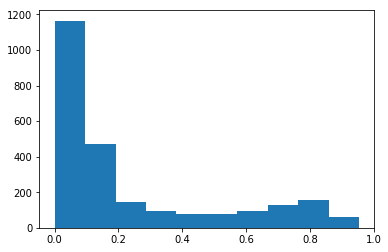

In [98]:
plt.hist(predictions);

In [136]:
# optimizing threshold
probabilities = rfc_smote.predict_proba(X_test_st)[:,1]
reals = y_test
best_cost = -10**10
best_thresh = 0
for threshold in np.linspace(0,1,51):
    predictions = probabilities >= threshold
    tp = sum((reals == 1) & (predictions == 1))
    fp = sum((reals == 0) & (predictions == 1))
    tn = sum((reals == 0) & (predictions == 0))
    fn = sum((reals == 1) & (predictions == 0))
    tp_c = 2
    fp_c = -5
    tn_c = 1
    fn_c = 0
    cost = tp*tp_c + fp*fp_c + tn*tn_c + fn*fn_c
    if cost > best_cost:
        best_cost = cost
        best_thresh = threshold
    #print(f'cost is {cost} and threshold is {threshold}')
    #print(f'tp is {tp}, fp is {fp}, tn is {tn}, fn is {fn}')
        
print(f'best is...{best_thresh}')

best is...0.8200000000000001
